# DBSCAN

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/dbscan.ipynb)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de regroupement (clustering) de données. Son objectif principal est d'identifier des groupes de points dans un ensemble de données en se basant sur la densité des points dans l'espace.

Le fonctionnement de l'algorithme est le suivant : il commence par choisir un point au hasard et examine son voisinage immédiat. S'il trouve suffisamment de points à l'intérieur d'un rayon spécifique (appelé rayon de recherche) autour du point initial, il considère ces points comme faisant partie d'un groupe et continue à s'étendre pour trouver plus de points dans leur voisinage. Ce processus est répété jusqu'à ce qu'il ne soit plus possible de trouver plus de points à l'intérieur du rayon de recherche, à ce moment-là, un groupe est considéré comme formé.

DBSCAN peut distinguer entre les points centraux, les points limites et les points de bruit en fonction de leur densité relative dans l'espace. Cela lui permet d'identifier des groupes de formes et de tailles différentes, et il peut également gérer des ensembles de données avec du bruit.

En résumé, DBSCAN est un algorithme de regroupement basé sur la densité qui peut identifier des groupes de points en fonction de la proximité et de la densité des données, ce qui le rend utile pour la détection de groupes dans des ensembles de données complexes et bruités.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/DBSCAN)

In [60]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U matplotlib
# !pip3 install -q -U scikit-learn

## Données

Création d'un jeu de données synthétiques:

In [61]:
from sklearn.datasets import make_blobs

random_state=123

# Des clusters pas très détachés 
# X, labels = make_blobs(n_samples=500, centers=4, cluster_std=1, random_state=random_state)

# Des clusters bien détachés
X, labels = make_blobs(n_samples=500, centers=[(-2, 2), (2, 2), (2, -2), (-2, -2)], cluster_std=0.4, random_state=random_state)

Visualisation:

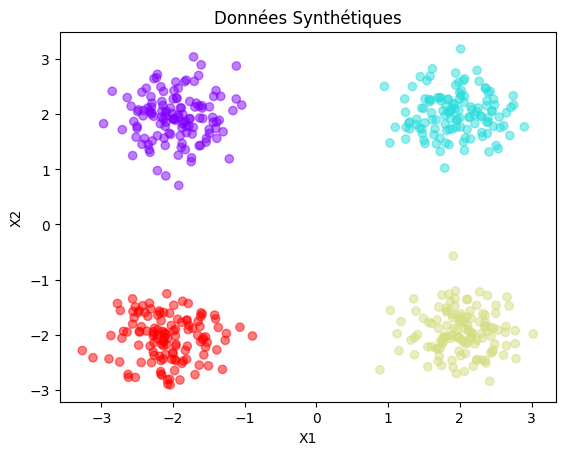

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5, cmap='rainbow')
plt.title("Données Synthétiques")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## DBSCAN avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, rand_score

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X)

silhouette = silhouette_score(X, dbscan.labels_)
print(f"Score de silhouette : {silhouette}")

rand = rand_score(labels, dbscan.labels_)
print(f"Score de rand : {rand}")

Score de silhouette : 0.810136867716804
Score de rand : 1.0


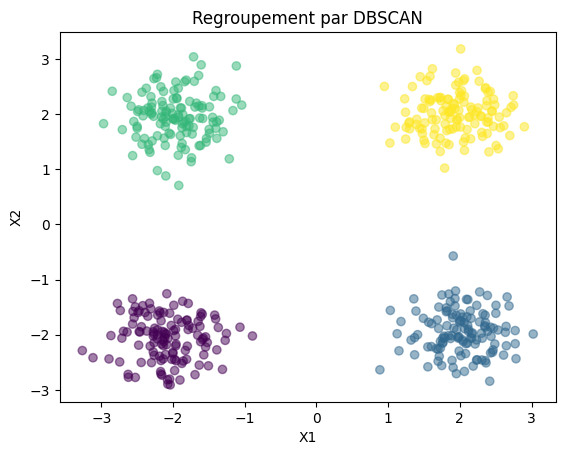

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, alpha=0.5, cmap='viridis')
plt.title("Regroupement par DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()